In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1. We have the min and max temperatures in a city In India for each months of the year.
#We would like to find a function to describe this and show it graphically, the dataset
#given below.
#Task:
#1.fitting it to the periodic function
#2.plot the fit
#Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [5]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)
days = np.linspace(0, 12, num=365)

In [6]:
from scipy import optimize
def temp_yearly(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(temp_yearly, months,
                                      max_temp, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(temp_yearly, months,
                                      min_temp, [-40, 20, 0])

Text(0, 0.5, 'Temperature ($^\\circ$C)')

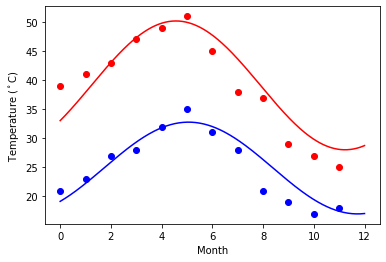

In [8]:
plt.plot(months, max_temp, 'ro')
plt.plot(days, temp_yearly(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, temp_yearly(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

In [9]:
titanic=pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


([<matplotlib.patches.Wedge at 0x27690cd6280>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'Male'),
  Text(0.48083667958064136, -0.9893412391939719, 'Female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

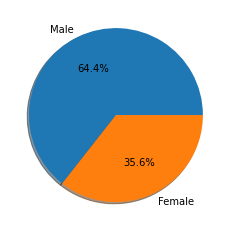

In [10]:
#1. Create a pie chart presenting the male/female proportion

lst=[titanic['sex'].value_counts()[0],titanic['sex'].value_counts()[1]]
plt.pie((titanic['sex'].value_counts()),labels=('Male','Female'),autopct='%1.1f%%',shadow=True)

In [11]:
titanic = titanic.dropna(subset=['sex'])

Text(0, 0.5, 'Age')

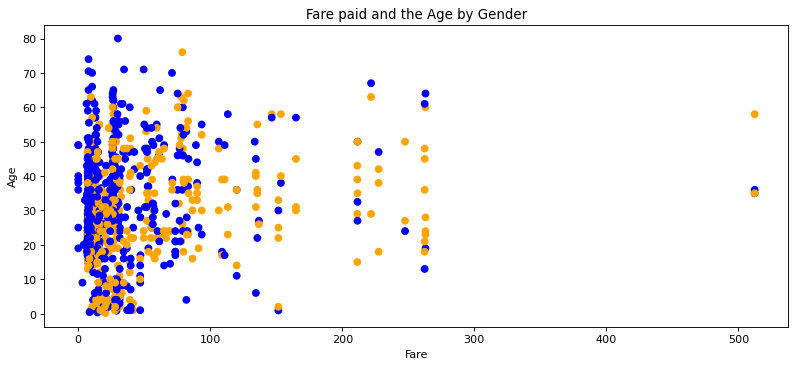

In [12]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

colors = {'male':'blue', 'female':'orange'}
plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(x=titanic.fare,y=titanic.age,c=titanic['sex'].map(colors))
plt.title('Fare paid and the Age by Gender')
plt.xlabel('Fare')
plt.ylabel('Age')